In [32]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

gid = '1927913657'

data_url = 'https://docs.google.com/spreadsheets/d/1gXP8iEXccCww04Cji2DnHF2zCWSO-svxn71gVeacIVQ/edit?gid=1927913657#gid=1927913657'
csv_export_url = data_url.replace(f'/edit?gid={gid}#gid={gid}', f'/export?format=csv&gid={gid}')


df = pd.read_csv(csv_export_url)

df[:-5]

,No.,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,NaN,7504,12/3/2025,BANJIR,Kecamatan:\nKec. Marisa Ds. Bungalita Ds. Teratai,Pohuwato,Gorontalo,Dokumentasi,NaN,NaN,NaN,NaN,0.0,72.0,0
1,2,NaN,5205,12/3/2025,BANJIR,Kecamatan:\nKec. Woja Kel. Kandai Dua Kel. Mo...,Dompu,Nusa Tenggara Barat,Dokumentasi,NaN,NaN,NaN,NaN,0.0,251.0,0
2,3,NaN,3604,12/3/2025,CUACA EKSTREM,Kecamatan:\nKec. Kopo Ds. Nyompok,Serang,Banten,Dokumentasi,NaN,NaN,NaN,NaN,15.0,NaN,0
3,4,NaN,8205,12/3/2025,BANJIR,Kecamatan:\nKec. Sulabesi Ds. Bega,Kepulauan Sula,Maluku Utara,Dokumentasi,NaN,NaN,NaN,NaN,0.0,NaN,1
4,5,NaN,5206,12/3/2025,BANJIR,Kecamatan:\nKec. Bolo Ds. Rato Ds. Nggembe,Bima,Nusa Tenggara Barat,Dokumentasi,NaN,NaN,NaN,NaN,0.0,197.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27442,27443,3376 101 2020 01 01 1,3376,1/1/2020,BANJIR,KEC. Tegal Barat. Tegal Timur. Tegal Selatan. ...,KOTA TEGAL,JAWA TENGAH,Dokumentasi,NaN,0.0,0.0,0.0,0.0,2.0,0
27443,27444,3602 101 2020 01 01 1,3602,1/1/2020,BANJIR,Kec. Sajira Ds Calung Bungur (4 kp) Ds Bungur ...,LEBAK,BANTEN,Dokumentasi,• Akibat meluapnya sungai Ciberang dan sungai ...,9.0,2.0,67.0,2389.0,1110.0,45
27444,27445,6206 107 2020 01 01 1,6208,1/1/2020,KEBAKARAN HUTAN DAN LAHAN,NaN,SUKAMARA,KALIMANTAN TENGAH,Dokumentasi,• Masih dalam penyelidikan pihak berwajib,0.0,0.0,0.0,0.0,0.0,0
27445,27446,3322 102 2020 01 01 1,3322,1/1/2020,TANAH LONGSOR,KEC. BANYUBIRU DS. SEPAKUNG,SEMARANG,JAWA TENGAH,Dokumentasi,NaN,0.0,0.0,0.0,1.0,0.0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27452 entries, 0 to 27451
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   No.                      27452 non-null  int64  
 1   Kode Identitas Bencana   25939 non-null  object 
 2   ID Kabupaten             27452 non-null  int64  
 3   Tanggal Kejadian         27452 non-null  object 
 4   Kejadian                 27452 non-null  object 
 5   Lokasi                   26528 non-null  object 
 6   Kabupaten                27452 non-null  object 
 7   Provinsi                 27452 non-null  object 
 8   Kronologi & Dokumentasi  27452 non-null  object 
 9   Penyebab                 15881 non-null  object 
 10  Meninggal                16125 non-null  float64
 11  Hilang                   15819 non-null  float64
 12  Terluka                  16202 non-null  float64
 13  Rumah Rusak              27451 non-null  float64
 14  Rumah Terendam        

In [34]:
df.isnull().sum()

,0
No.,0
Kode Identitas Bencana,1513
ID Kabupaten,0
Tanggal Kejadian,0
Kejadian,0
Lokasi,924
Kabupaten,0
Provinsi,0
Kronologi & Dokumentasi,0
Penyebab,11571


In [35]:
#Normalisasi

provinsi = {
    "ACEH": "Aceh",
    "Aceh": "Aceh",
    "BALI": "Bali",
    "BANTEN": "Banten",
    "BENGKULU": "Bengkulu",
    "Bali": "Bali",
    "Banten": "Banten",
    "Bengkulu": "Bengkulu",
    "DAERAH ISTIMEWA YOGYAKARTA": "Daerah Istimewa Yogyakarta",
    "DI YOGYAKARTA": "Daerah Istimewa Yogyakarta",
    "DKI JAKARTA": "Daerah Khusus Ibukota Jakarta",
    "DKI Jakarta": "Daerah Khusus Ibukota Jakarta",
    "Daerah Istimewa Yogyakarta": "Daerah Istimewa Yogyakarta",
    "GORONTALO": "Gorontalo",
    "Gorontalo": "Gorontalo",
    "JAMBI": "Jambi",
    "JAWA BARAT": "Jawa Barat",
    "JAWA TENGAH": "Jawa Tengah",
    "JAWA TIMUR": "Jawa Timur",
    "Jambi": "Jambi",
    "Jawa Barat": "Jawa Barat",
    "Jawa Tengah": "Jawa Tengah",
    "Jawa Timur": "Jawa Timur",
    "KALIMANTAN BARAT": "Kalimantan Barat",
    "KALIMANTAN SELATAN": "Kalimantan Selatan",
    "KALIMANTAN TENGAH": "Kalimantan Tengah",
    "KALIMANTAN TIMUR": "Kalimantan Timur",
    "KALIMANTAN UTARA": "Kalimantan Utara",
    "KEPULAUAN BANGKA BELITUNG": "Kepulauan Bangka Belitung",
    "KEPULAUAN RIAU": "Kepulauan Riau",
    "Kalimantan Barat": "Kalimantan Barat",
    "Kalimantan Selatan": "Kalimantan Selatan",
    "Kalimantan Tengah": "Kalimantan Tengah",
    "Kalimantan Timur": "Kalimantan Timur",
    "Kalimantan Utara": "Kalimantan Utara",
    "Kepulauan Bangka Belitung": "Kepulauan Bangka Belitung",
    "Kepulauan Riau": "Kepulauan Riau",
    "LAMPUNG": "Lampung",
    "Lampung": "Lampung",
    "MALUKU": "Maluku",
    "MALUKU UTARA": "Maluku Utara",
    "Maluku": "Maluku",
    "Maluku Utara": "Maluku Utara",
    "NUSA TENGGARA BARAT": "Nusa Tenggara Barat",
    "NUSA TENGGARA TIMUR": "Nusa Tenggara Timur",
    "Nusa Tenggara Barat": "Nusa Tenggara Barat",
    "Nusa Tenggara Timur": "Nusa Tenggara Timur",
    "P A P U A": "Papua",
    "PAPUA": "Papua",
    "PAPUA BARAT": "Papua Barat",
    "PAPUA BARAT DAYA": "Papua Barat Daya",
    "PAPUA PEGUNUNGAN": "Papua Pegunungan",
    "PAPUA SELATAN": "Papua Selatan",
    "PAPUA TENGAH": "Papua Tengah",
    "Papua": "Papua",
    "Papua Barat": "Papua Barat",
    "Papua Barat Daya": "Papua Barat Daya",
    "Papua Pegunungan": "Papua Pegunungan",
    "Papua Selatan": "Papua Selatan",
    "Papua Tengah": "Papua Tengah",
    "RIAU": "Riau",
    "Riau": "Riau",
    "SULAWESI BARAT": "Sulawesi Barat",
    "SULAWESI SELATAN": "Sulawesi Selatan",
    "SULAWESI TENGAH": "Sulawesi Tengah",
    "SULAWESI TENGGARA": "Sulawesi Tenggara",
    "SULAWESI UTARA": "Sulawesi Utara",
    "SUMATERA BARAT": "Sumatera Barat",
    "SUMATERA SELATAN": "Sumatera Selatan",
    "SUMATERA UTARA": "Sumatera Utara",
    "Sulawesi Barat": "Sulawesi Barat",
    "Sulawesi Selatan": "Sulawesi Selatan",
    "Sulawesi Tengah": "Sulawesi Tengah",
    "Sulawesi Tenggara": "Sulawesi Tenggara",
    "Sulawesi Utara": "Sulawesi Utara",
    "Sumatera Barat": "Sumatera Barat",
    "Sumatera Selatan": "Sumatera Selatan",
    "Sumatera Utara": "Sumatera Utara"
}

#Kabupaten
df['Kabupaten'] = df['Kabupaten'].str.title()
df['Kabupaten'] = df['Kabupaten'].str.strip()

#Provinsi
df['Provinsi'] = df['Provinsi'].replace(provinsi)
df['Provinsi'] = df['Provinsi'].str.upper().str.strip()


#Kejadian
df['Kejadian'] = df['Kejadian'].str.upper().str.strip()

df[:-5]

,No.,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,NaN,7504,12/3/2025,BANJIR,Kecamatan:\nKec. Marisa Ds. Bungalita Ds. Teratai,Pohuwato,GORONTALO,Dokumentasi,NaN,NaN,NaN,NaN,0.0,72.0,0
1,2,NaN,5205,12/3/2025,BANJIR,Kecamatan:\nKec. Woja Kel. Kandai Dua Kel. Mo...,Dompu,NUSA TENGGARA BARAT,Dokumentasi,NaN,NaN,NaN,NaN,0.0,251.0,0
2,3,NaN,3604,12/3/2025,CUACA EKSTREM,Kecamatan:\nKec. Kopo Ds. Nyompok,Serang,BANTEN,Dokumentasi,NaN,NaN,NaN,NaN,15.0,NaN,0
3,4,NaN,8205,12/3/2025,BANJIR,Kecamatan:\nKec. Sulabesi Ds. Bega,Kepulauan Sula,MALUKU UTARA,Dokumentasi,NaN,NaN,NaN,NaN,0.0,NaN,1
4,5,NaN,5206,12/3/2025,BANJIR,Kecamatan:\nKec. Bolo Ds. Rato Ds. Nggembe,Bima,NUSA TENGGARA BARAT,Dokumentasi,NaN,NaN,NaN,NaN,0.0,197.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27442,27443,3376 101 2020 01 01 1,3376,1/1/2020,BANJIR,KEC. Tegal Barat. Tegal Timur. Tegal Selatan. ...,Kota Tegal,JAWA TENGAH,Dokumentasi,NaN,0.0,0.0,0.0,0.0,2.0,0
27443,27444,3602 101 2020 01 01 1,3602,1/1/2020,BANJIR,Kec. Sajira Ds Calung Bungur (4 kp) Ds Bungur ...,Lebak,BANTEN,Dokumentasi,• Akibat meluapnya sungai Ciberang dan sungai ...,9.0,2.0,67.0,2389.0,1110.0,45
27444,27445,6206 107 2020 01 01 1,6208,1/1/2020,KEBAKARAN HUTAN DAN LAHAN,NaN,Sukamara,KALIMANTAN TENGAH,Dokumentasi,• Masih dalam penyelidikan pihak berwajib,0.0,0.0,0.0,0.0,0.0,0
27445,27446,3322 102 2020 01 01 1,3322,1/1/2020,TANAH LONGSOR,KEC. BANYUBIRU DS. SEPAKUNG,Semarang,JAWA TENGAH,Dokumentasi,NaN,0.0,0.0,0.0,1.0,0.0,0


In [36]:
#Cleaning and Visualisasi Pie Chart


#Pastikan semua nuemrik
df['Rumah Rusak'] = pd.to_numeric(df['Rumah Rusak'], errors='coerce')


#Mencari jumlah rumah rusak per kejadian, agregasi
agg_series = df.groupby('Kejadian')['Rumah Rusak'].sum().sort_values(ascending=False)

#Ambil bencana 5 terbesar dan grup sisanya
top_n = agg_series.iloc[:5]
others = agg_series.iloc[5:].sum()

#Buat row baru nama lainnya dan concat series dan row itu menjadi sebuah df baru
agg_series = top_n.reset_index()
new_row = pd.DataFrame({'Kejadian': ['LAINNYA'], 'Rumah Rusak': [others]})
agg_df = pd.concat([agg_series, new_row], ignore_index=True)

#Tambah kolom persentanse
total_damage = agg_df['Rumah Rusak'].sum()
agg_df['Percentage'] = agg_df['Rumah Rusak'] / total_damage

agg_df['Legend_Label'] = agg_df.apply(
    lambda x: f"{x['Kejadian']} ({x['Percentage']:.1%}, {x['Rumah Rusak']:,.0f})",
    axis=1
)


#Visualisasi
chart = alt.Chart(agg_df).mark_arc(outerRadius=200).encode(
    theta=alt.Theta("Rumah Rusak", stack=True),
    color=alt.Color("Legend_Label", sort=alt.EncodingSortField(field="Rumah Rusak", order="descending"), legend=alt.Legend(title="Kejadian (Persentase, Total)")),
    order=alt.Order("Rumah Rusak", sort="descending"),
    tooltip=[
        "Kejadian",
        alt.Tooltip("Rumah Rusak", format=","),
        alt.Tooltip("Percentage", format=".2%")
    ]
).properties(
    title=alt.TitleParams(text="Proportion of House Damage based on Disaster Type", fontSize=24),
    width=600,
    height=500
).configure_legend(
    orient='none',
    legendX=640,
    legendY=100,
    titleFontSize=18,
    labelFontSize=14,
    symbolSize=500,
    titleLimit=0,
    labelLimit=0
)


chart

#chart.save('pie_chart_rumah_rusak.json')


alt.Chart(...)

In [41]:



#Mencari rumah rusak berdasarkan kejadian berdasarkan provinsi, agregasi
agg_series_prov = df.groupby(['Provinsi', 'Kejadian'], as_index=False)['Rumah Rusak'].sum()


total_damage_per_provinsi = agg_series_prov.groupby('Provinsi')['Rumah Rusak'].sum().sort_values(ascending=False)
sorted_provinces = total_damage_per_provinsi.index.tolist()


chart = alt.Chart(agg_series_prov).mark_bar().encode(

    x=alt.X('Rumah Rusak', title='Total Rumah Rusak', axis=alt.Axis(titlePadding=20)),


    y=alt.Y('Provinsi', sort=sorted_provinces, title='Provinsi', axis=alt.Axis(titlePadding=20)),

    color=alt.Color('Kejadian', legend=alt.Legend(title="Jenis Bencana")),

    tooltip=[
        'Provinsi',
        'Kejadian',
        alt.Tooltip('Rumah Rusak', format=',')
    ]
).properties(
    title=alt.TitleParams('Distribusi Kerusakan Rumah per Provinsi berdasarkan Jenis Bencana', offset=30, fontSize=24),
    width=700,
    height=800
).configure_axis(
    labelFontSize=11,
    titleFontSize=16
).configure_legend(
    titleFontSize=18,
    labelFontSize=14,
    symbolSize=500
)

chart

alt.Chart(...)

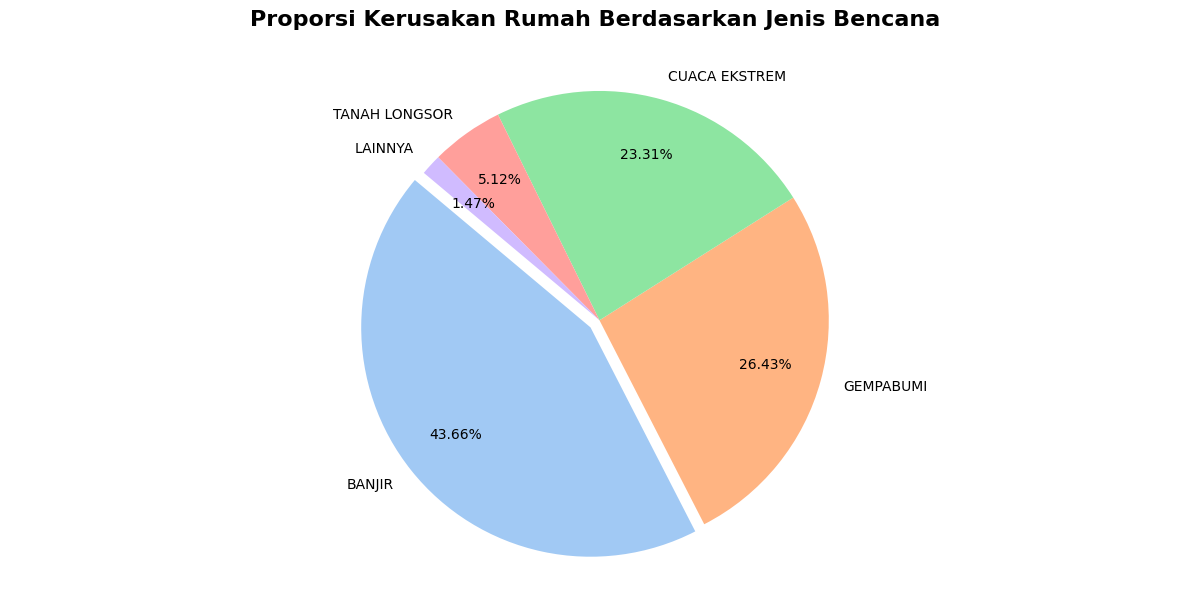

In [38]:
#Mencari jumlah rumah rusak per kejadian, agregasi
agg_series = df.groupby('Kejadian')['Rumah Rusak'].sum().sort_values(ascending=False)

n = 4

if len(agg_series) > n:
    main_events = agg_series.iloc[:n]
    others = agg_series.iloc[n:].sum()

    new_row = pd.Series([others], index=['LAINNYA'])
    plot_data = pd.concat([main_events, new_row])
else:
    plot_data = agg_series


plt.figure(figsize=(12, 6))


colors = sns.color_palette('pastel')[0:len(plot_data)]


explode = [0.05 if i == 0 else 0 for i in range(len(plot_data))]

# Plot
wedges, texts, autotexts = plt.pie(
    plot_data,
    labels=plot_data.index,
    autopct='%1.2f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    labeldistance=1.1,
    pctdistance=0.75,
    textprops={'fontsize': 10}
)



plt.title('Proporsi Kerusakan Rumah Berdasarkan Jenis Bencana', fontsize=16, fontweight='bold', pad = 30)
plt.axis('equal')
plt.tight_layout()


plt.show()
# plt.savefig('beautiful_pie_chart.png', dpi=300)